In [1]:
from wirecell.util.wires import schema, persist
import wirecell.raygrid.crossover as xover
import wirecell.raygrid.tiling as tiling
import torch, numpy as np, math

In [5]:
import matplotlib.pyplot as plt

### Get the wires file and use it to make a raygrids-Coordinates object from Face 1

In [2]:
store = persist.load('/home/jacob/protodunevd-wires-larsoft-v3.json.bz2')
coords = xover.coords_from_schema(store, 1)

7.655555547475519
7.646455787070552
5.099999999999999
skipping parallel view pair: il=1 im=4


In [4]:
nwires

[286, 287, 292]

### Get the centers of the 0th rays in the 'real' views

In [6]:
centers = [coords.views[i][0].detach().numpy() for i in range(2,5)]
centers

[array([    4.27223, -1687.1799 ], dtype=float32),
 array([    4.828885, -3361.5     ], dtype=float32),
 array([    3.05, -2524.5 ], dtype=float32)]

### Also get the pitch directions and magnitudes

In [27]:
pitch_dirs = [coords.pitch_dir[i].detach().numpy() for i in range(2,5)]
pitch_mags = [coords.pitch_mag[i].detach().numpy() for i in range(2,5)]
print(pitch_dirs)
print(pitch_mags)

[array([ 0.50036234, -0.8658161 ], dtype=float32), array([0.5001058 , 0.86596435], dtype=float32), array([1., 0.], dtype=float32)]
[array(7.655547, dtype=float32), array(7.6464834, dtype=float32), array(5.0999994, dtype=float32)]


### Get the unit vectors perpendicular to the pitch direction. This will point along the ray itself and will be used to draw the ray

In [8]:
unit_vs = [np.linalg.matmul(pd.detach().numpy(), [[0,-1],[1,0]]) for pd in pitch_dirs]
unit_vs

[array([-0.86581612, -0.50036234]),
 array([ 0.86596435, -0.5001058 ]),
 array([ 0., -1.])]

In [9]:
print(centers[0], centers[0]+unit_vs[0])

[    4.27223 -1687.1799 ] [    3.40641403 -1687.68029398]


### This demonstrates drawing the 0th rays from views 1 and 2 (V and W)

(-3400.0, -3200.0)

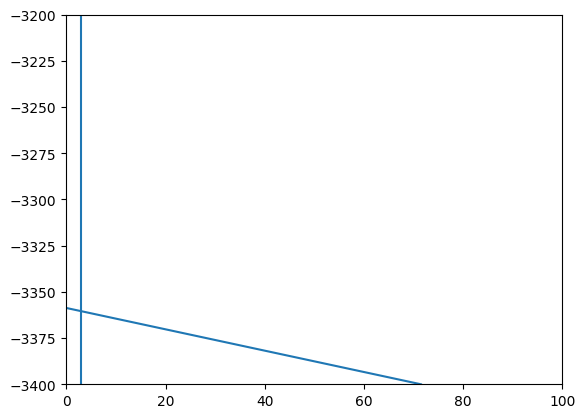

In [14]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=1; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
i=2; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
ax.set_xlim(0, 100)
ax.set_ylim(-3400, -3200)

### We can get the point where the 0th rays from views 1 and 2 cross. Note: have to account for the 2 'trivial' views. This is from the Coordinates object itself, so the crossing point calculation is bespoke so-to-speak

In [16]:
x = coords.ray_crossing(3, torch.tensor([0]), 4, torch.tensor([0]))
x

tensor([[ 3.0500e+00, -3.3605e+03]])

### Drawing it looks ok from far away

In [ ]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=1; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
i=2; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
ax.scatter(*(x[0].tolist()))
ax.set_xlim(0, 100)
ax.set_ylim(-3400, -3200)

### But we zoom in and we can see it's slightly off

(-3360.47, -3360.475)

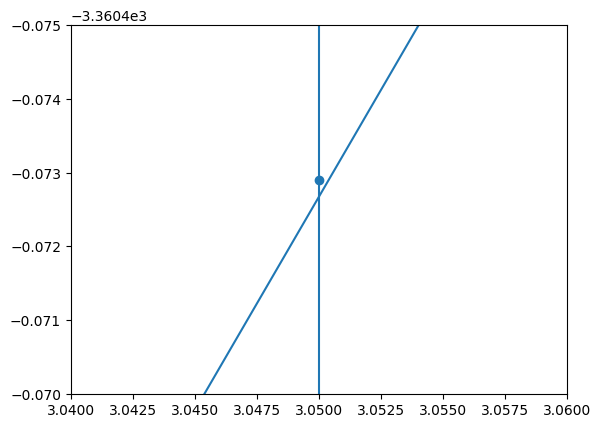

In [23]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=1; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
i=2; ax.axline((centers[i]), (centers[i]+unit_vs[i]))
ax.scatter(*(x[0].tolist()))
ax.set_xlim(3.04, 3.06)
ax.set_ylim(-3360.47, -3360.475)

### Let's see some other ray pairs

In [31]:
ray0_68 = centers[0] + 68*pitch_mags[0]*pitch_dirs[0]
ray0_69 = centers[0] + 69*pitch_mags[0]*pitch_dirs[0]
ray1_122 = centers[1] + 122*pitch_mags[1]*pitch_dirs[1]
ray1_123 = centers[1] + 123*pitch_mags[1]*pitch_dirs[1]
ray2_0 = centers[2] + 0*pitch_mags[2]*pitch_dirs[2]
ray2_1 = centers[2] + 1*pitch_mags[2]*pitch_dirs[2]

(-2350.0, -2260.0)

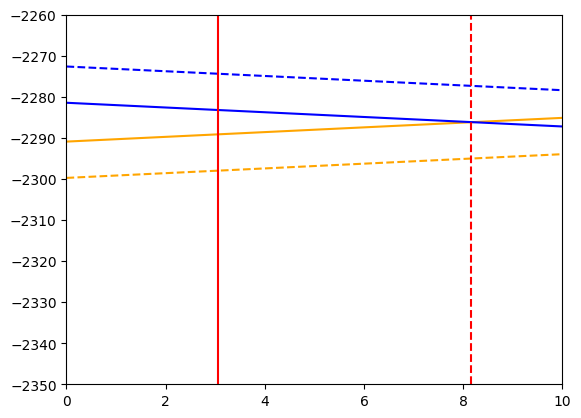

In [64]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=0; ax.axline(ray0_68, ray0_68+unit_vs[i], color='orange')
i=0; ax.axline(ray0_69, ray0_69+unit_vs[i], color='orange', linestyle='dashed')
i=1; ax.axline(ray1_122, ray1_122+unit_vs[i], color='blue')
i=1; ax.axline(ray1_123, ray1_123+unit_vs[i], color='blue', linestyle='dashed')
i=2; ax.axline(ray2_0, ray2_0+unit_vs[i], color='red')
i=2; ax.axline(ray2_1, ray2_1+unit_vs[i], color='red', linestyle='dashed')
# ax.scatter(*(x[0].tolist()))
ax.set_xlim(0, 10)
ax.set_ylim(-2350, -2260)

### Also get the crossing points from these rays 

In [50]:
rcs = dict()
rays = {0:[68,69], 1:[122,123], 2:[0,1]}
for l1, rs1 in rays.items():
    for l2, rs2 in rays.items():
        if l1 == l2: continue
        for r1 in rs1:
            for r2 in rs2:
                rcs[(l1,r1,l2,r2)] = coords.ray_crossing(l1+2, torch.Tensor([r1]), l2+2, torch.Tensor([r2]))


### Zoom in on where rays 68, 122, and 1 from views 0, 1, 2 respectively overlap (drawn by-hand) and also draw the ray crossing points found from coords.

#### 68 x 1 from views 0 and 2 is close, but the other 2 are quite far off


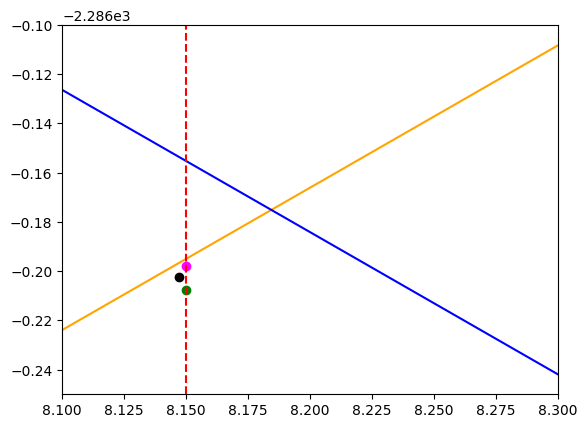

In [68]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=0; ax.axline(ray0_68, ray0_68+unit_vs[i], color='orange')
i=0; ax.axline(ray0_69, ray0_69+unit_vs[i], color='orange', linestyle='dashed')
i=1; ax.axline(ray1_122, ray1_122+unit_vs[i], color='blue')
i=1; ax.axline(ray1_123, ray1_123+unit_vs[i], color='blue', linestyle='dashed')
i=2; ax.axline(ray2_0, ray2_0+unit_vs[i], color='red')
i=2; ax.axline(ray2_1, ray2_1+unit_vs[i], color='red', linestyle='dashed')
# ax.scatter(*(x[0].tolist()))
ax.set_xlim(8.1, 8.3)
ax.set_ylim(-2286.25, -2286.10)


#Also show what coords has for the ray-crossings
ax.scatter(*(rcs[0, 68, 1, 122][0].tolist()), color='black') #Compare to orange x blue
ax.scatter(*(rcs[0, 68, 2, 1][0].tolist()), color='magenta') #Compare to orange x red
ax.scatter(*(rcs[1, 122, 2, 1][0].tolist()), color='green') #Compare to blue x red

### Let's see the impacts on tiling

In [69]:
trivial_blobs = tiling.trivial_blobs()

#### Let's assume the rays indicating this problem are high.

In [70]:
nwires = [len(store.planes[i].wires) for i in store.faces[1].planes]
ws = [torch.zeros(nw).to(int) for nw in nwires]
ws[0][68]=1
ws[1][122]=1
ws[2][0]=1

In [74]:
blobs_0 = tiling.apply_activity(coords, trivial_blobs, ws[0])
blobs_1 = tiling.apply_activity(coords, blobs_0, ws[1])
blobs_2 = tiling.apply_activity(coords, blobs_1, ws[2])

#### Redrawing for reference

(-2350.0, -2240.0)

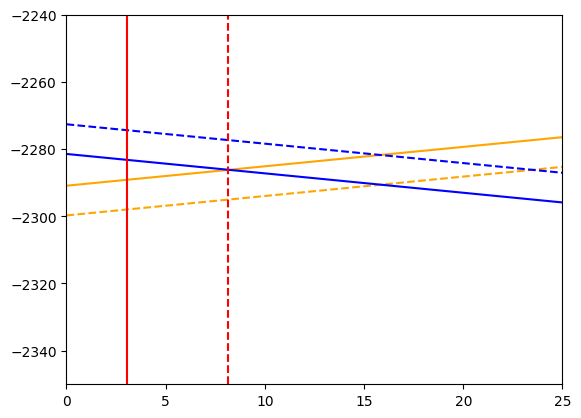

In [82]:
fig, ax = plt.subplots()
# ax.set_aspect('equal')
i=0; ax.axline(ray0_68, ray0_68+unit_vs[i], color='orange')
i=0; ax.axline(ray0_69, ray0_69+unit_vs[i], color='orange', linestyle='dashed')
i=1; ax.axline(ray1_122, ray1_122+unit_vs[i], color='blue')
i=1; ax.axline(ray1_123, ray1_123+unit_vs[i], color='blue', linestyle='dashed')
i=2; ax.axline(ray2_0, ray2_0+unit_vs[i], color='red')
i=2; ax.axline(ray2_1, ray2_1+unit_vs[i], color='red', linestyle='dashed')
# ax.scatter(*(x[0].tolist()))
ax.set_xlim(0, 25)
ax.set_ylim(-2350, -2240)

#### This blob makes sense -- it's just the 68th ray overlapping the trivials

In [75]:
blobs_0

tensor([[[ 0,  1],
         [ 0,  1],
         [68, 69]]])

#### This also makes sense -- we can see this diamond above extending from (8, 23) in x and (-2390, -2275) in y

In [76]:
blobs_1

tensor([[[  0,   1],
         [  0,   1],
         [ 68,  69],
         [122, 123]]])

#### This one is problematic.

#### Above in jupyter cell 68, we saw that ray 1 in view 2 does not cross into the previous blob if we consider the lines we drew (which were created from the 'primitive' inputs of the Coordinates object). However, the 'bespoke' ray crossing calculations align with this: the crossing for the rays from views 0&2 (magenta point) and views 1&2 (green point) lie to the right of the crossing of views 0&1 (black point)

In [84]:
blobs_2

tensor([[[  0,   1],
         [  0,   1],
         [ 68,  69],
         [122, 123],
         [  0,   1]]])